# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression

* a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)  
* linear regression model prediction equation:  
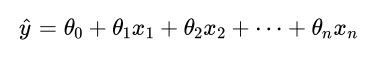  
* linear regression model prediction (vectorized form):  
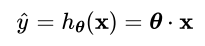

#### Generating linear-looking random data with y = 4 + 3x1 + Gaussian noise

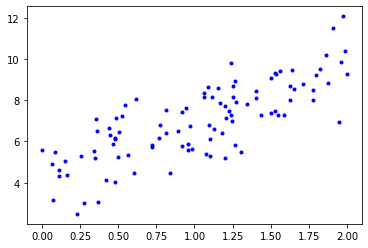

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")

#### Computing theta-hat(theta best) using Normal Equation:  
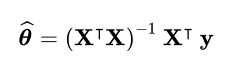

In [3]:
X_b = np.c_[np.ones((100, 1)), X]         # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

##### Actual **theta(0)**=4 & **theta(1)**=3 but the noise made it impossible to recover the exact parameters

In [4]:
theta_best

array([[4.28652207],
       [2.65552906]])

#### Making prdictions using theta-hat

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]      # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.28652207],
       [9.59758019]])

#### Plotting the model's prediction

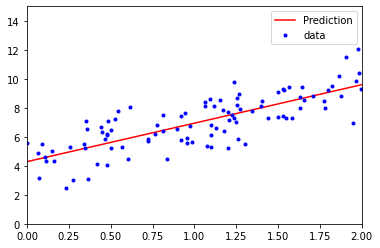

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(('Prediction', 'data'))

#### Performing Linear Regression using **Sklearn**

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [8]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.28652207]), array([[2.65552906]]))

In [9]:
lin_reg.predict(X_new)

array([[4.28652207],
       [9.59758019]])

#### Numpy's least square method to compute Linear Regression using `np.linalg.lstsq()`
 
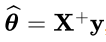

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.28652207],
       [2.65552906]])

#### Applying Pseudoinverse directly using `np.linalg.pinv()`  
* pseudoinverse is computed using a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix **X** into the matrix multiplication of three matrices **U Σ V⊺**

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.28652207],
       [2.65552906]])

# Gradient Descent
* it is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems  
*  general idea of *Gradient Descent* is to tweak parameters iteratively in order to minimize a cost
function

#### Batch Gradient Descent implementation

In [12]:
eta = 0.1                       # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)    # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

##### Value of **theta** is same as of Normal Equation or SVD

In [13]:
theta

array([[4.28652207],
       [2.65552906]])

In [14]:
X_new_b.dot(theta)

array([[4.28652207],
       [9.59758019]])

##### Initial 10 steps of Gradient Descent with 3 differet learning rates(eta)

In [15]:
# this code block is from: https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

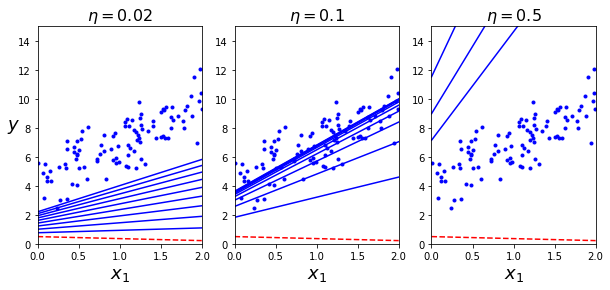

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


#### Stochastic Gradient Descent implementation

##### Algorithm preparation

In [17]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

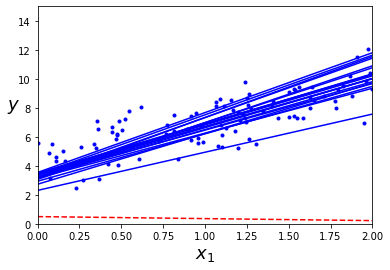

In [18]:
n_epochs = 50
t0, t1 = 5, 50                                      # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)                        # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)   
            style = "b-" if i > 0 else "r--" 
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)         

plt.plot(X, y, "b.")                         
plt.xlabel("$x_1$", fontsize=18)             
plt.ylabel("$y$", rotation=0, fontsize=18)   
plt.axis([0, 2, 0, 15])                      
plt.show()                                   

##### Value of **theta**

In [19]:
theta

array([[4.29003232],
       [2.69858756]])

##### `SGDRegressor` in linear_model module of scikit-learn   

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

##### SGD intercept and Coffiecient

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.30429839]), array([2.68767837]))

#### Mini-Batch GD

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)                # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

##### Value of **theta**

In [23]:
theta

array([[4.15993322],
       [2.50457369]])

#### Different Gradient Descent paths: **Batch, Stochastic & Mini-batch**

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [25]:
theta_path_mgd

array([[[3.28629382],
        [3.6036229 ]],

       [[3.2502119 ],
        [3.42710421]],

       [[3.42113742],
        [3.54869079]],

       [[3.38056383],
        [3.37075341]],

       [[3.54931924],
        [3.50252274]],

       [[3.50815498],
        [3.36069751]],

       [[3.73499439],
        [3.50553724]],

       [[3.5005167 ],
        [3.13914909]],

       [[3.588655  ],
        [3.19085729]],

       [[3.5835676 ],
        [3.14073406]],

       [[3.6778077 ],
        [3.16976463]],

       [[3.74802368],
        [3.24964508]],

       [[3.65915619],
        [3.0599092 ]],

       [[3.78930218],
        [3.17255824]],

       [[3.74440031],
        [3.01151611]],

       [[3.65180055],
        [2.85983243]],

       [[3.80061741],
        [2.97034357]],

       [[3.88004582],
        [3.10504058]],

       [[3.99107171],
        [3.11851224]],

       [[3.9585904 ],
        [3.02637356]],

       [[3.81719062],
        [2.7441394 ]],

       [[4.00843706],
        [2.9

#### Gardient Descent paths plot

(2.5, 5.0, 2.0, 4.5)

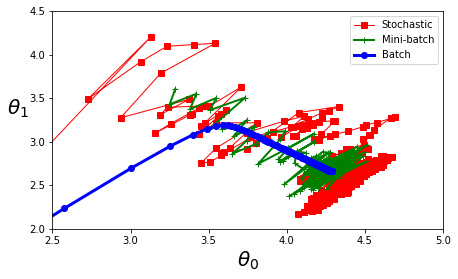

In [30]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper right", fontsize=10)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 5.0, 2.0, 4.5])

# Polynomial Regression
* for data more complex than a straight line polynomial regression is used
* powers of each feature are added as new features, then a linear model is trained on this extended set of features

In [32]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

#### Quadractic data plot

(-3.0, 3.0, 0.0, 10.0)

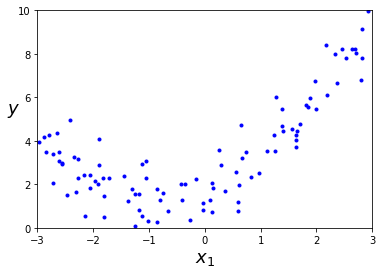

In [33]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

#### Transforming training data by adding the square of each feature in training set as new feature

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

#### X_poly now contains the original feature of X plus the square of this feature

In [36]:
X_poly[0]

array([-0.75275929,  0.56664654])

#### Quadratic fitting

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

#### Quadratic predictions plot

(-3.0, 3.0, 0.0, 10.0)

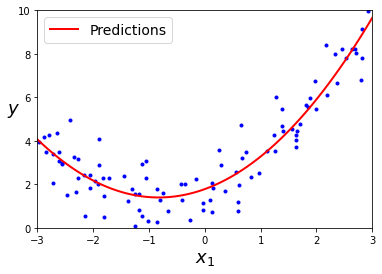

In [38]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

#### High degree polynomial plots

(-3.0, 3.0, 0.0, 10.0)

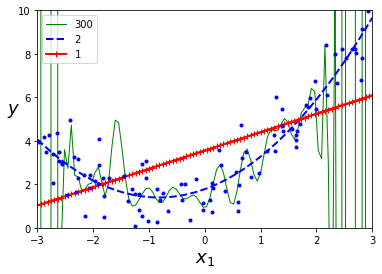

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

# Learning Curves
* these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

#### Underfitting learning curves plot

(0.0, 80.0, 0.0, 3.0)

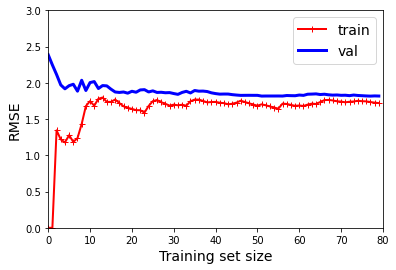

In [41]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])

#### Overfitting learning curves plot

(0.0, 80.0, 0.0, 3.0)

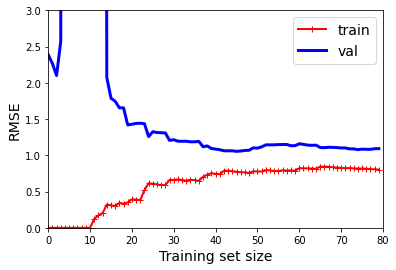

In [42]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown